In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:\ETL\Amazon Sale Report.csv\Amazon Sale Report.csv")

In [3]:
data.head(4)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

## To check count of unique values

In [6]:
data.nunique().to_frame(name= 'Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


## To check what are the unique values from the dataset and create a dataframe  where each row represents a column from the original DataFrame and contains its unique values.

In [7]:
data.apply(pd.unique).to_frame(name= 'Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [8]:
data['currency'].isnull().sum()

7795

In [9]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [10]:
data.drop(columns=['index','fulfilled-by', 'ship-country', 'currency', 'Sales Channel ', 'promotion-ids', 'ship-postal-code','ship-state', 'ship-city', 'Courier Status' ], inplace = True)

In [11]:
data.head(5)

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,406.00,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329.00,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574.00,False


In [12]:
data.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Qty                      0
Amount                7795
B2B                      0
dtype: int64

In [13]:
data['Amount'].fillna(0, inplace = True)

In [14]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
Amount                0
B2B                   0
dtype: int64

In [15]:
data.duplicated().sum()

6

In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data['B2B'].replace(to_replace = [True, False],value= ['Business','Customer'], inplace = True)

In [18]:
data.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,Customer
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,406.00,Customer
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329.00,Business
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,Customer
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574.00,Customer


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Month extraction from Date

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
data['Month'] = data['Date'].dt.month_name()

In [22]:
data.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,B2B,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,Customer,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,406.00,Customer,April
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329.00,Business,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,Customer,April
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574.00,Customer,April


In [23]:
data['Amount'] = data['Amount'].apply(int)

In [24]:
data['Month'].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

In [25]:
monthly_sales = data.groupby('Month')['Amount'].sum().sort_values(ascending = False)
monthly_sales

Month
April    28837654
May      26224163
June     23424125
March      101680
Name: Amount, dtype: int64

## monthly_sales.index & monthly_sales.values

In [26]:
monthly_sales.index

Index(['April', 'May', 'June', 'March'], dtype='object', name='Month')

In [27]:
monthly_sales.values

array([28837654, 26224163, 23424125,   101680], dtype=int64)

## Monthly Sales Distribution

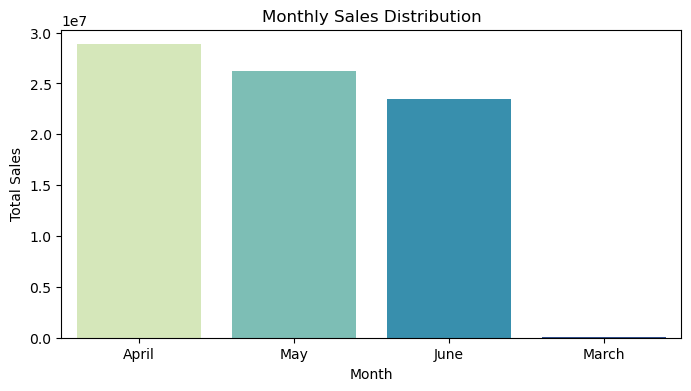

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='YlGnBu')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

## 4. Fulfillment Method Analysis

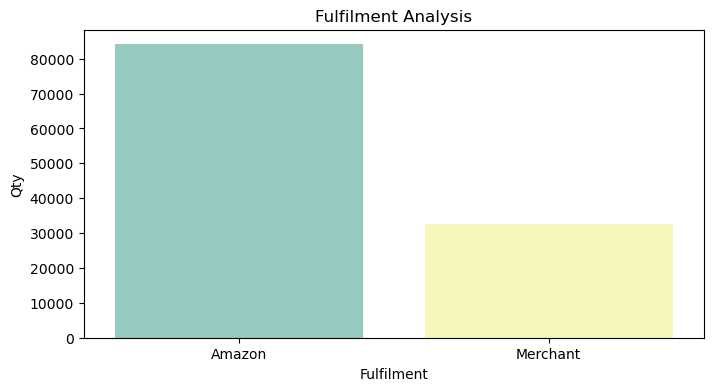

In [29]:
fulfillment_method = data.groupby('Fulfilment')['Qty'].sum().sort_values(ascending = False)
plt.figure(figsize =(8,4))
sns.barplot(x= fulfillment_method.index, y = fulfillment_method.values, palette = 'Set3' )
plt.title('Fulfilment Analysis')
plt.xlabel('Fulfilment')
plt.ylabel('Qty')
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128969 entries, 0 to 128974
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128969 non-null  object        
 1   Date                128969 non-null  datetime64[ns]
 2   Status              128969 non-null  object        
 3   Fulfilment          128969 non-null  object        
 4   ship-service-level  128969 non-null  object        
 5   Style               128969 non-null  object        
 6   SKU                 128969 non-null  object        
 7   Category            128969 non-null  object        
 8   Size                128969 non-null  object        
 9   ASIN                128969 non-null  object        
 10  Qty                 128969 non-null  int64         
 11  Amount              128969 non-null  int64         
 12  B2B                 128969 non-null  object        
 13  Month               128969 no

## groupby Category by sum

In [41]:
category_sum = data.groupby('Category')['Amount'].sum()
category_sum.to_frame(name = 'Total Amount')

,Total Amount
Category,
Blouse,458392
Bottom,150650
Dupatta,915
Ethnic Dress,791201
Saree,123931
Set,39200950
Top,5347661
Western Dress,11215783
kurta,21298139


In [36]:
order_status_distri = data['Status'].value_counts()
order_status_distri.to_frame()

,Status
Shipped,77801
Shipped - Delivered to Buyer,28769
Cancelled,18329
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35
Shipped - Rejected by Buyer,11


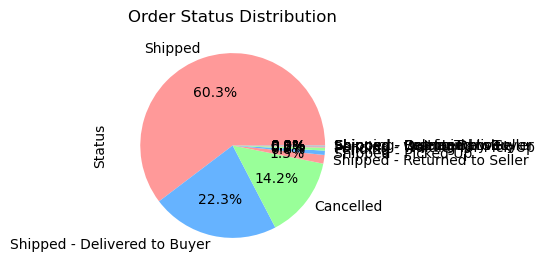

In [40]:
plt.figure(figsize=(5, 3))
order_status_distri.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Order Status Distribution')
plt.show()

## Cancellation Analysis

In [58]:
cancelled_orders =data[data['Status'] == 'Cancelled']
items_cancelled_per_order = cancelled_orders.groupby('Category')['Qty'].count().sort_values(ascending = False)
items_cancelled_per_order.to_frame(name='# of Items')

,# of Items
Category,
Set,7336
kurta,7253
Western Dress,2122
Top,1276
Ethnic Dress,145
Blouse,116
Bottom,60
Saree,21


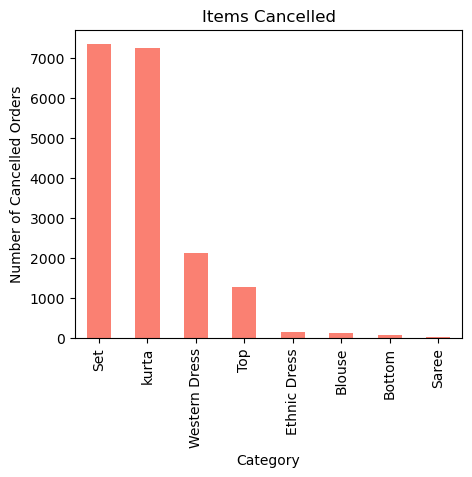

In [60]:
plt.figure(figsize=(5, 4))
items_cancelled_per_order.plot.bar(color='salmon')
plt.title('Items Cancelled')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.show()

In [61]:
data.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,B2B,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647,Customer,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,406,Customer,April
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329,Business,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753,Customer,April
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574,Customer,April


## Sku Analysis

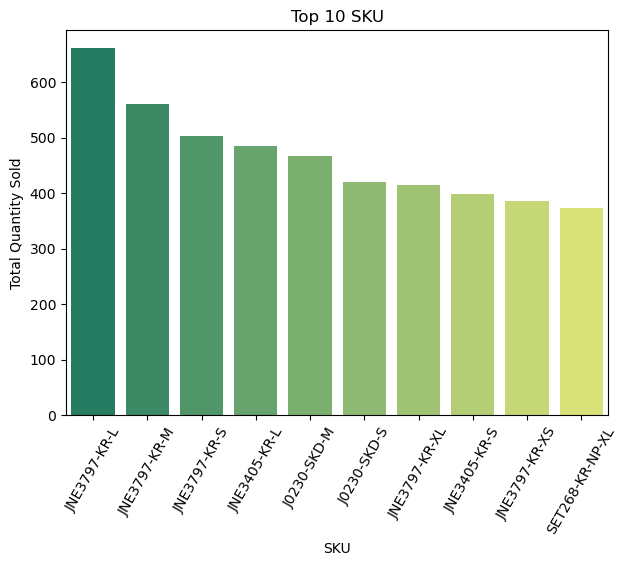

In [88]:
top_10_sku = data.groupby('SKU')['Qty'].sum().nlargest(10)
plt.figure(figsize = (7,5))
sns.barplot(x =top_10_sku.index, y = top_10_sku.values, palette= "summer")
plt.title('Top 10 SKU')
plt.xlabel('SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 60)
plt.show()

## Average Amount per order by Fulfilment

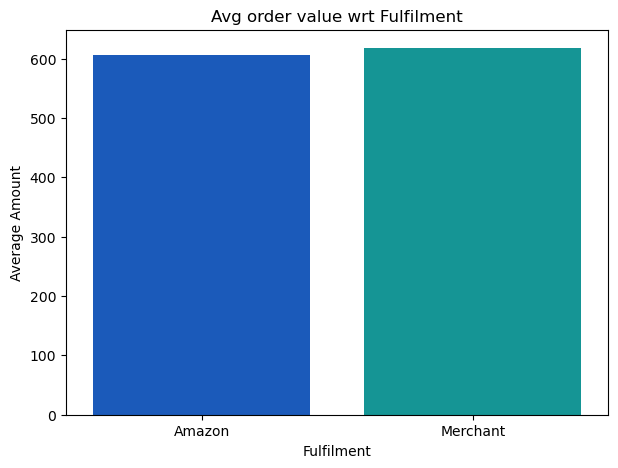

In [93]:
avg_amount_per_order_fulfillment = data.groupby('Fulfilment')['Amount'].mean()
plt.figure(figsize = (7,5))
sns.barplot(x =avg_amount_per_order_fulfillment.index, y = avg_amount_per_order_fulfillment.values, palette= "winter")
plt.title('Avg order value wrt Fulfilment')
plt.xlabel('Fulfilment')
plt.ylabel('Average Amount')
plt.show()

## Customer Retention

In [97]:
customer_retention = data[data['Status'] == 'Shipped - Delivered to Buyer'].groupby('Month')['Order ID'].nunique()

customer_retention

Month
April    11093
June      5908
March       16
May       9549
Name: Order ID, dtype: int64

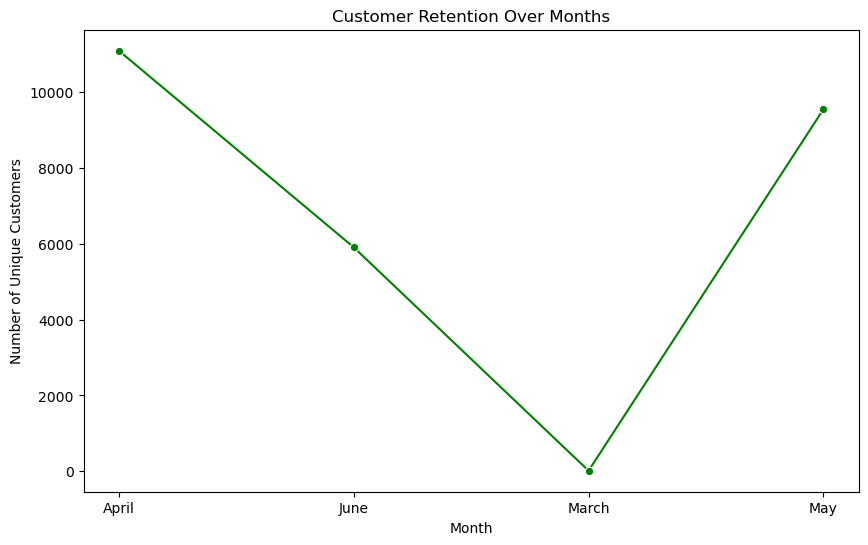

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=customer_retention.index, y=customer_retention.values, marker='o', color='green')
plt.title('Customer Retention Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.show()

### Pivot of Quantity Sold by Category and Size

In [101]:
pivot_data = data.pivot_table(index='Category', columns='Size', values='Qty', aggfunc='sum', fill_value=0)
pivot_data

Size,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Category,,,,,,,,,,,
Blouse,0,0,0,0,211,128,138,128,116,25,117
Bottom,60,0,0,0,0,67,50,67,64,26,64
Dupatta,0,0,0,0,3,0,0,0,0,0,0
Ethnic Dress,160,0,0,0,0,170,167,163,173,77,143
Saree,0,0,0,0,152,0,0,0,0,0,0
Set,5287,46,57,72,0,7399,8356,6708,6872,4882,5608
Top,1122,0,0,0,0,1647,1696,1146,1734,870,1688
Western Dress,1760,0,0,0,0,2546,2326,1962,2125,1280,1944
kurta,5134,352,456,616,0,8043,7713,5157,7838,2783,6952
